In [307]:
# %pylab inline
import json
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
import sklearn
import pandas as pd
from typing import Tuple
from typing import List
from matplotlib import pyplot as plt
%matplotlib inline  
import seaborn as sns   #probs need to pip install seaborn
import xgboost
import numpy as np
import pickle
import random
from sklearn.model_selection import StratifiedShuffleSplit, KFold
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import accuracy_score, f1_score, recall_score

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.cross_validation import KFold

#from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams

import plotly as py
#py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [308]:
inputfile = 'convertedDataBlinking.csv'
dataset = pd.read_csv(inputfile)
# convert to arrays from strings

#stratifying sample 
thought = dataset[dataset['labels'] == 1]
print(len(thought))
notthought = dataset[dataset['labels'] == 0]
notthought.reset_index(drop=True)
notthoughtsample = notthought.sample(len(thought), replace=False, weights=None)
stratified_df = thought.append(notthoughtsample, ignore_index = True, verify_integrity=True)
dataset = stratified_df

 # shuffling it
dataset = dataset.sample(frac=1).reset_index(drop=True)

dataset.waves = dataset.waves.map(json.loads)
print(len(dataset))

90
180


In [309]:
inputtestfile = 'convertedDataBlinkingTest.csv'
datasetTest = pd.read_csv(inputtestfile)

#stratifying sampleTest 
thought = datasetTest[datasetTest['labels'] == 1]
notthought = datasetTest[datasetTest['labels'] == 0]
notthought.reset_index(drop=True)
notthoughtsample = notthought.sample(len(thought), replace=False, weights=None)
stratified_df = thought.append(notthoughtsample, ignore_index = True, verify_integrity=True)
datasetTest = stratified_df

 # shuffling it
# datasetTest = datasetTest.sample(frac=1).reset_index(drop=True)


datasetTest.waves = datasetTest.waves.map(json.loads)

In [310]:
print(len(dataset))
print(len(datasetTest))

180
180


In [311]:
np.unique(dataset.waves[0])[:10] #for model maybe try to exclude outliers. 

array([-31976,   -218,   -217,   -216,   -215,   -202,   -200,   -198,
         -197,   -190])

In [312]:
waves = dataset.waves.tolist()
newList = []
for entry in waves:
    result = np.array(entry)
    newList.append(result)

In [313]:
wavesTest = datasetTest.waves.tolist()
newListTest = []
for entry in wavesTest:
    result = np.array(entry)
    newListTest.append(result)

In [314]:
X_train = np.array(newList)
Y_train = np.array(dataset['labels'])

In [315]:
X_test = np.array(newListTest)
Y_test = np.array(datasetTest['labels'])

In [316]:
assert X_train.shape[0] == Y_train.shape[0]

X_train.shape, Y_train.shape # just a check that everything has the right size

((180, 512), (180,))

In [317]:
assert X_test.shape[0] == Y_test.shape[0]
X_test.shape, Y_test.shape # just a check that everything has the right size

((180, 512), (180,))

In [318]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [319]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier()]

log_cols = ["Classifier", "F1-Score"]
log 	 = pd.DataFrame(columns=log_cols)

f1_dict = {}

/Users/carinasauter/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning:

Variables are collinear.

/Users/carinasauter/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning:

Variables are collinear



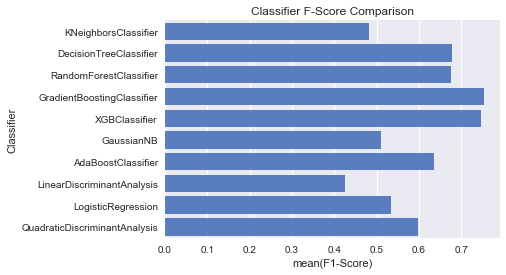

In [320]:
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, Y_train)
    train_predictions = clf.predict(X_test)
    f1score = f1_score(Y_test, train_predictions)
    if name in f1_dict:
        f1_dict[name] += f1score
    else:
        f1_dict[name] = f1score

for clf in f1_dict:
    f1_dict[clf] = f1_dict[clf]
    log_entry = pd.DataFrame([[clf, f1_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('F1 Score')
plt.title('Classifier F-Score Comparison')
sns.set_color_codes("muted")
sns.barplot(x='F1-Score', y='Classifier', data=log, color="b")

In [321]:
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
result

0.76666666666666672

Confusion matrix, without normalization
[[74 16]
 [26 64]]


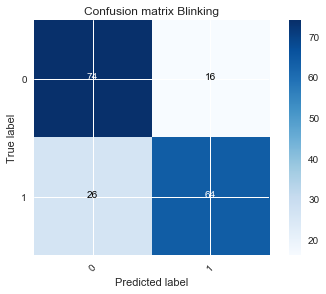

In [322]:
cnf_matrix = confusion_matrix(Y_test, model.predict(X_test))
np.set_printoptions(precision=2)
import itertools

# Plot non-normalized confusion matrix
plt.figure()
class_names = np.unique(Y_test)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix Blinking')

plt.savefig('matrix.svg')

In [262]:
# np.unique(model.predict(X_test))

In [280]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.75555555555555554

In [281]:
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(Y_test, model.predict(X_test)).ravel()

Confusion matrix, without normalization
[[75 15]
 [29 61]]


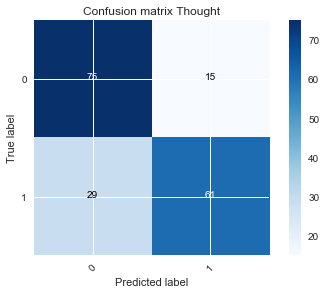

In [282]:
cnf_matrix = confusion_matrix(Y_test, model.predict(X_test))
np.set_printoptions(precision=2)
import itertools

# Plot non-normalized confusion matrix
plt.figure()
class_names = np.unique(Y_test)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix Thought')

In [ ]:
def modelfit(alg, X_train, Y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label= Y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train ,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : " + str(metrics.accuracy_score(Y_train, dtrain_predictions)))
    print ("AUC Score (Train): " + str(metrics.roc_auc_score(Y_train, dtrain_predprob)))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
rfc_classifier.get_params()

In [ ]:
param_test1 = {
    'max_depth':[4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7],
    'min_samples_split': [2,3],
    'min_weight_fraction_leaf': [0.0,0.1,0.2,0.3],
    'n_estimators':[8,10,12],
    'criterion': ['gini', 'entropy'],
    'random_state': [27],
    'min_impurity_split'
}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
rfc2.fit(X_train, Y_train)
result = rfc2.score(X_test, Y_test)
result

In [ ]:
print(rfc_classifier.predict(X_test))

In [ ]:
rfc_classifier.score(X_test,Y_test)

In [235]:
# save the model to disk
filename = 'mindreadingmodelHouse.sav'
pickle.dump(model, open(filename, 'wb'))